In [1]:
import fastf1
import fastf1.plotting
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
import numpy as np

fastf1.plotting.setup_mpl(misc_mpl_mods=False)

In [2]:
SESSION = 'British'
YEAR = 2023

fastf1.plotting.setup_mpl(misc_mpl_mods=False)

race = fastf1.get_session(YEAR, SESSION, 'R')
race.load()

req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: C:\Users\WillMItchell\AppData\Local\Temp\fastf1.
	Size: 244.4 MB


core           INFO 	Loading data for British Grand Prix - Race [v3.0.6]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '44', '81', '63', '11', '14', '23', '16', '55', '2', '77', '27', '18', '24', '22', '21', '10', '20', '31']


In [3]:
driver_laps = race.laps.pick_quicklaps().reset_index()
drivers = pd.unique(race.laps['Driver'])

stints = driver_laps[["Driver", "Stint", "Compound", "LapNumber", "LapTime", "TyreLife"]]
stints['LapTimeSeconds'] = stints['LapTime'].dt.total_seconds()
stints['FullName'] = stints['Driver'].map(fastf1.plotting.DRIVER_TRANSLATE)
stints['Color'] = stints['FullName'].map(fastf1.plotting.DRIVER_COLORS)
stints.reset_index(drop=True)
stints.head()

C:\Users\WillMItchell\AppData\Local\Temp\ipykernel_14868\3165656705.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stints['LapTimeSeconds'] = stints['LapTime'].dt.total_seconds()
C:\Users\WillMItchell\AppData\Local\Temp\ipykernel_14868\3165656705.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stints['FullName'] = stints['Driver'].map(fastf1.plotting.DRIVER_TRANSLATE)
C:\Users\WillMItchell\AppData\Local\Temp\ipykernel_14868\3165656705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a 

,Driver,Stint,Compound,LapNumber,LapTime,TyreLife,LapTimeSeconds,FullName,Color
0,VER,1.0,MEDIUM,2.0,0 days 00:01:33.433000,2.0,93.433,max verstappen,#0600ef
1,VER,1.0,MEDIUM,3.0,0 days 00:01:32.730000,3.0,92.730,max verstappen,#0600ef
2,VER,1.0,MEDIUM,4.0,0 days 00:01:32.780000,4.0,92.780,max verstappen,#0600ef
3,VER,1.0,MEDIUM,5.0,0 days 00:01:32.582000,5.0,92.582,max verstappen,#0600ef
4,VER,1.0,MEDIUM,6.0,0 days 00:01:33.027000,6.0,93.027,max verstappen,#0600ef


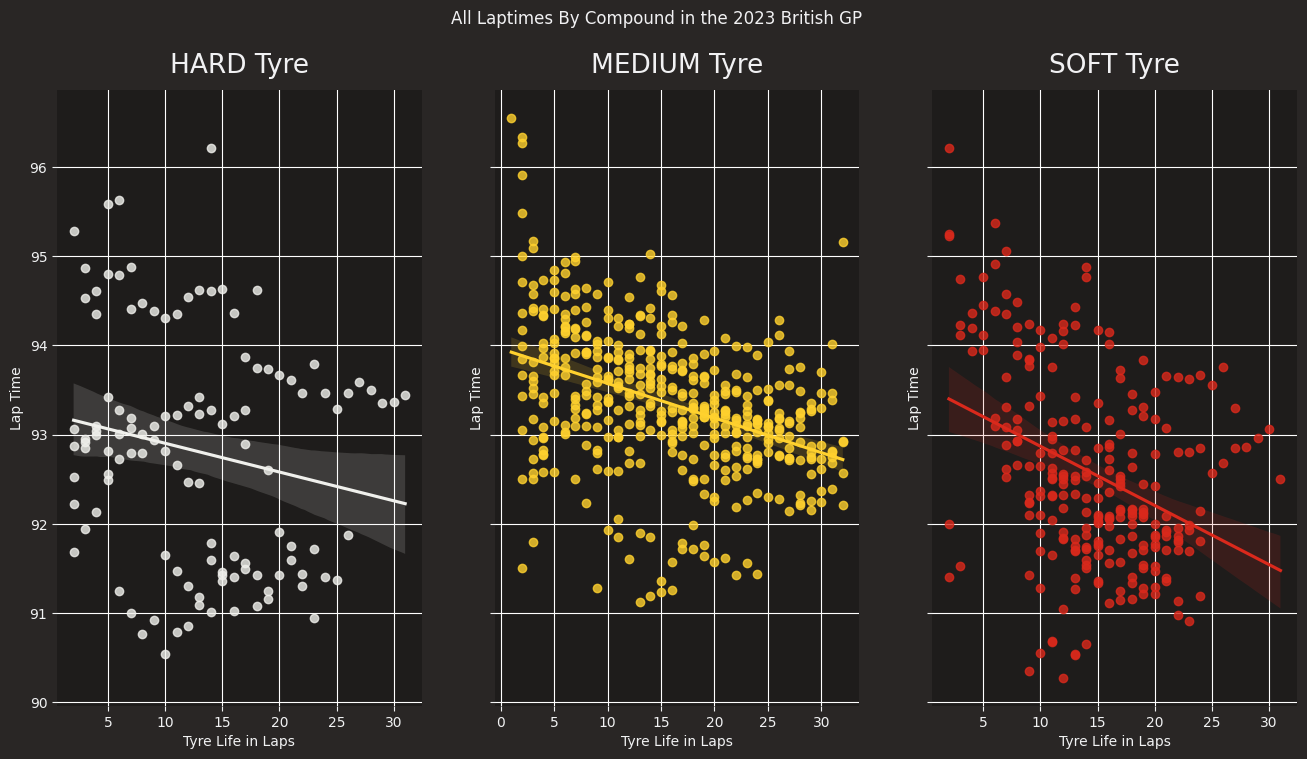

In [6]:
fig, ax = plt.subplots(ncols=3, figsize=(16, 8), sharey=True)

for idx, compound in enumerate(['HARD', 'MEDIUM', 'SOFT']):
    sns.regplot(x="TyreLife",
            y="LapTimeSeconds",
            data=stints.loc[stints['Compound'] == compound].reset_index(),
            color=fastf1.plotting.COMPOUND_COLORS[compound],
            ax=ax[idx]
            )
    ax[idx].set_xlabel("Tyre Life in Laps")
    ax[idx].set_ylabel("Lap Time")
    ax[idx].set_title(f'{compound} Tyre')
    ax[idx].grid(color='w', which='major', axis='both')


# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
plt.suptitle(f"All Laptimes By Compound in the {YEAR} {SESSION} GP")

# Turn on major grid lines
sns.despine(left=True, bottom=True)

Text(0.5, 0.98, 'All Laptimes By Driver in the 2023 British GP')

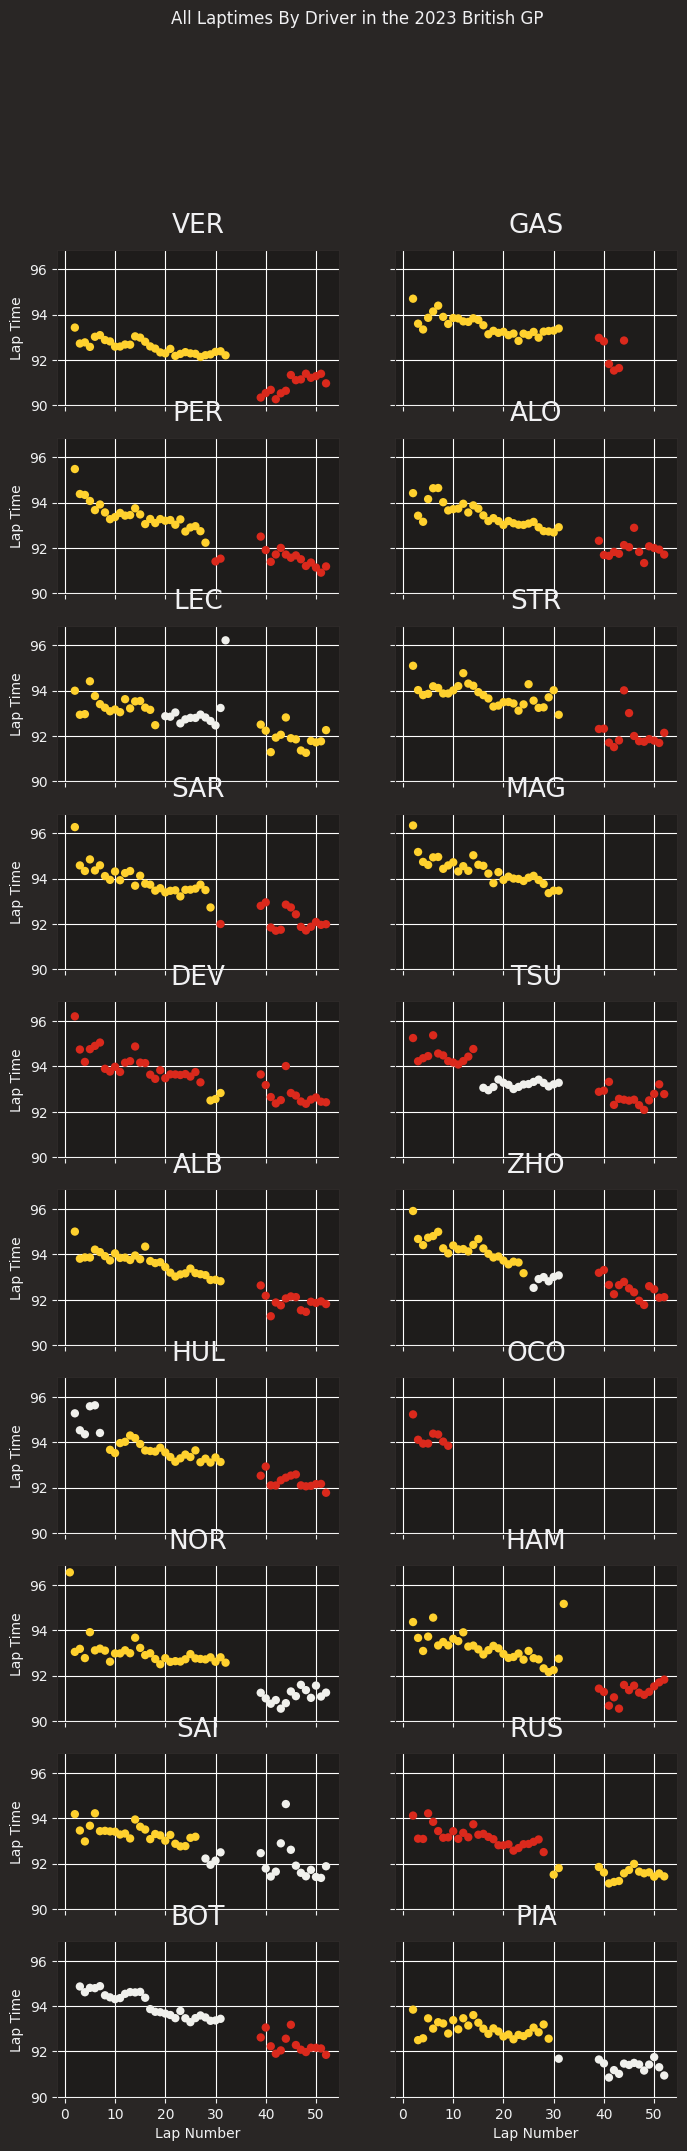

In [5]:
fig, ax = plt.subplots(10,2, figsize=(8,24), sharey=True, sharex=True)

for idx, driver in enumerate(drivers):
    # Odd drivers go on the left, even on the right
    column = idx % 2
    
    # 2 drivers per row
    row = idx // 2
    
    driver_stints = stints.pick_driver(driver).reset_index()
    
    sns.scatterplot(data=driver_stints,
                    x="LapNumber",
                    y="LapTimeSeconds",
                    ax=ax[row, column],
                    hue="Compound",
                    palette=fastf1.plotting.COMPOUND_COLORS,
                    #s=80,
                    linewidth=0,
                    legend=False)

    ax[row, column].set_xlabel("Lap Number")
    ax[row, column].set_ylabel("Lap Time")
    ax[row, column].set_title(driver)
    ax[row, column].grid(color='w', which='major', axis='both')

    ax[row, column].invert_yaxis()


fig.suptitle(f"All Laptimes By Driver in the {YEAR} {SESSION} GP")